In [ ]:
# Ubah dataset menjadi dataframes
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

In [ ]:
# tampilkan 3 data teratas
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df = df.rename(columns={'Gender':'gender', 'Age':'age', 
                   'Annual Income (k$)':'annual_income',
                   'Spending Score (1-100)':'spending_score'})

# Ubah atribut kategorikal menjadi numerikal
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [ ]:
# import kmeans dari module kmeans.cluster
from sklearn.cluster import KMeans

# hapus kolom CustomerID karena tidak relevan dengan model
X = df.drop(['CustomerID'], axis=1)

# buat iterasi untuk mendapatkan data inertia
clusters = []
for i in range(1, 11):
  model = KMeans(n_clusters=i).fit(X)
  clusters.append(model.inertia_)

In [ ]:
print(clusters)

[308862.06000000006, 212889.44245524297, 143391.59236035682, 104434.82333370822, 75399.61541401483, 58348.64136331505, 51130.69008126376, 44355.31351771352, 40655.68621378622, 37084.6755930271]


Text(0.5, 0, 'Clusters')

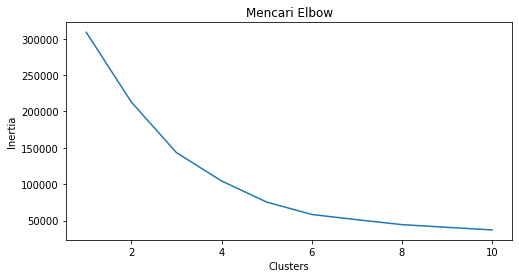

In [ ]:
# buat plot inertia untuk mencari elbow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=(i for i in range(1,11)), y=clusters, ax=ax)
ax.set_title("Mencari Elbow")
ax.set_ylabel("Inertia")
ax.set_xlabel("Clusters")

In [ ]:
# model dengan n_clusters = 5
model = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


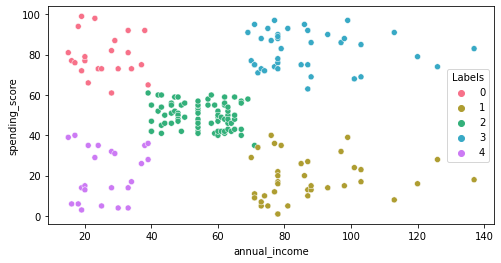

In [ ]:
# buat kolom baru pada dataframes X untuk label
X['Labels'] = model.labels_

# buat plot untuk visualisasi clustering
fig, ax = plt.subplots(figsize=(8, 4))
# buat scatter plot untuk clustering data
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], palette=sns.color_palette('husl', 5))